# 神经网络
***Author: Neo***

***Date: 2022年3月17日***

In [9]:
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 25, kernel_size=3),
            nn.BatchNorm2d(25),
            nn.ReLU(inplace=True)
        )

        self.layer2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(25, 50, kernel_size=3),
            nn.BatchNorm2d(50),
            nn.ReLU(inplace=True)
        )

        self.layer4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc = nn.Sequential(
            nn.Linear(50 * 5 * 5, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [12]:
batch_size = 64
learning_rate = 0.02
num_epoches = 20

data_tf = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize([0.5], [0.5])]
                             )

train_dataset = datasets.MNIST(root='./data/CNN', train=True, transform=data_tf, download=True)
test_dataset = datasets.MNIST(root='./data/CNN', train=False, transform=data_tf)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = CNN()
if torch.cuda.is_available():
    print("GPU being used:",torch.cuda.get_device_name(0))
    model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

epoch = 0
for data in train_loader:
    img, label = data
    img = Variable(img)
    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()
    else:
        img = Variable(img)
        label = Variable(label)
    out = model(img)
    loss = criterion(out, label)
    print_loss = loss.data.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch+=1
    if epoch%50 == 0:
        print('epoch: {}, loss: {:.4}'.format(epoch, loss.data.item()))

model.eval()
eval_loss = 0
eval_acc = 0
for data in test_loader:
    img, label = data
    img = Variable(img)
    if torch.cuda.is_available():
        img = img.cuda()
        label = label.cuda()

    out = model(img)
    loss = criterion(out, label)
    eval_loss += loss.data.item()*label.size(0)
    _, pred = torch.max(out, 1)
    num_correct = (pred == label).sum()
    eval_acc += num_correct.item()
print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
    eval_loss / (len(test_dataset)),
    eval_acc / (len(test_dataset))
))

GPU being used: NVIDIA GeForce GTX 1660 Ti
epoch: 50, loss: 1.218
epoch: 100, loss: 0.7465
epoch: 150, loss: 0.2736
epoch: 200, loss: 0.3094
epoch: 250, loss: 0.245
epoch: 300, loss: 0.1442
epoch: 350, loss: 0.2229
epoch: 400, loss: 0.1992
epoch: 450, loss: 0.2431
epoch: 500, loss: 0.142
epoch: 550, loss: 0.06459
epoch: 600, loss: 0.1641
epoch: 650, loss: 0.1162
epoch: 700, loss: 0.05381
epoch: 750, loss: 0.03344
epoch: 800, loss: 0.154
epoch: 850, loss: 0.1666
epoch: 900, loss: 0.01518
Test Loss: 0.069124, Acc: 0.980400


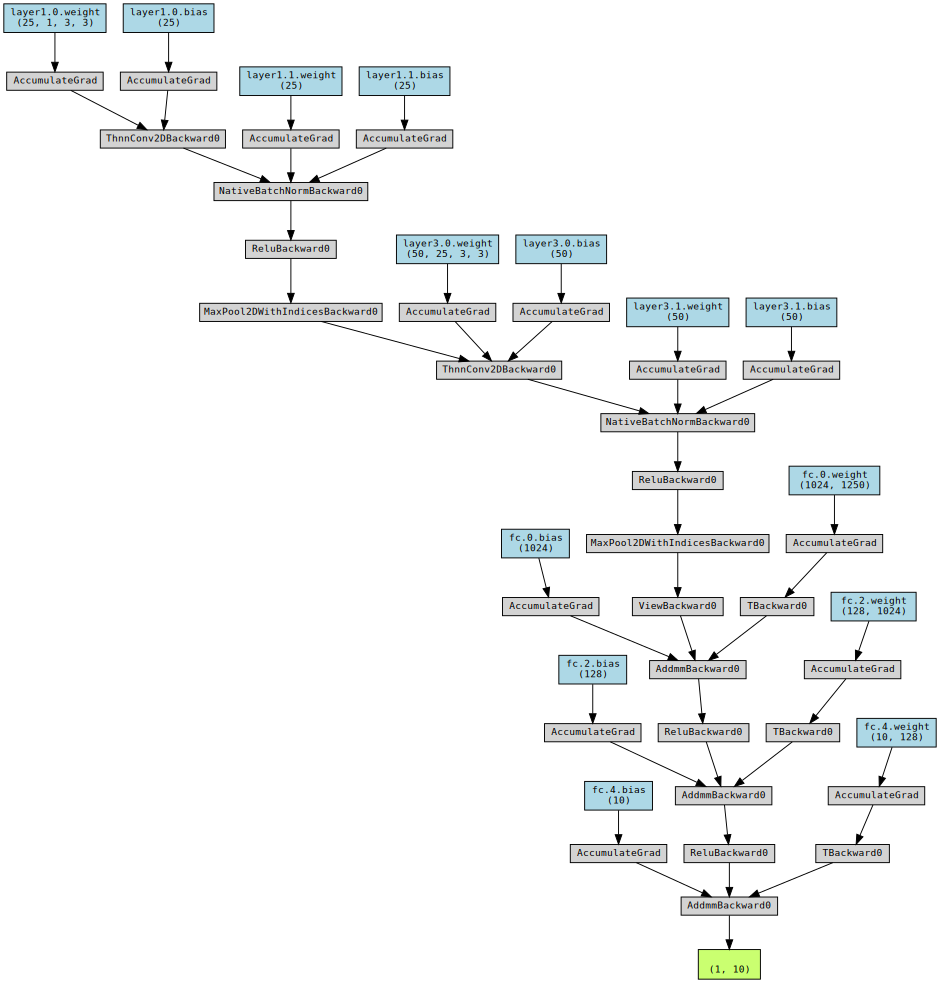

In [13]:
net=CNN()
a=torch.randn(1,1,28,28)
make_dot(net(a),params=dict(net.named_parameters()))